In [1]:
import numpy as np
import matplotlib.pyplot as plt
import function as func
import sys

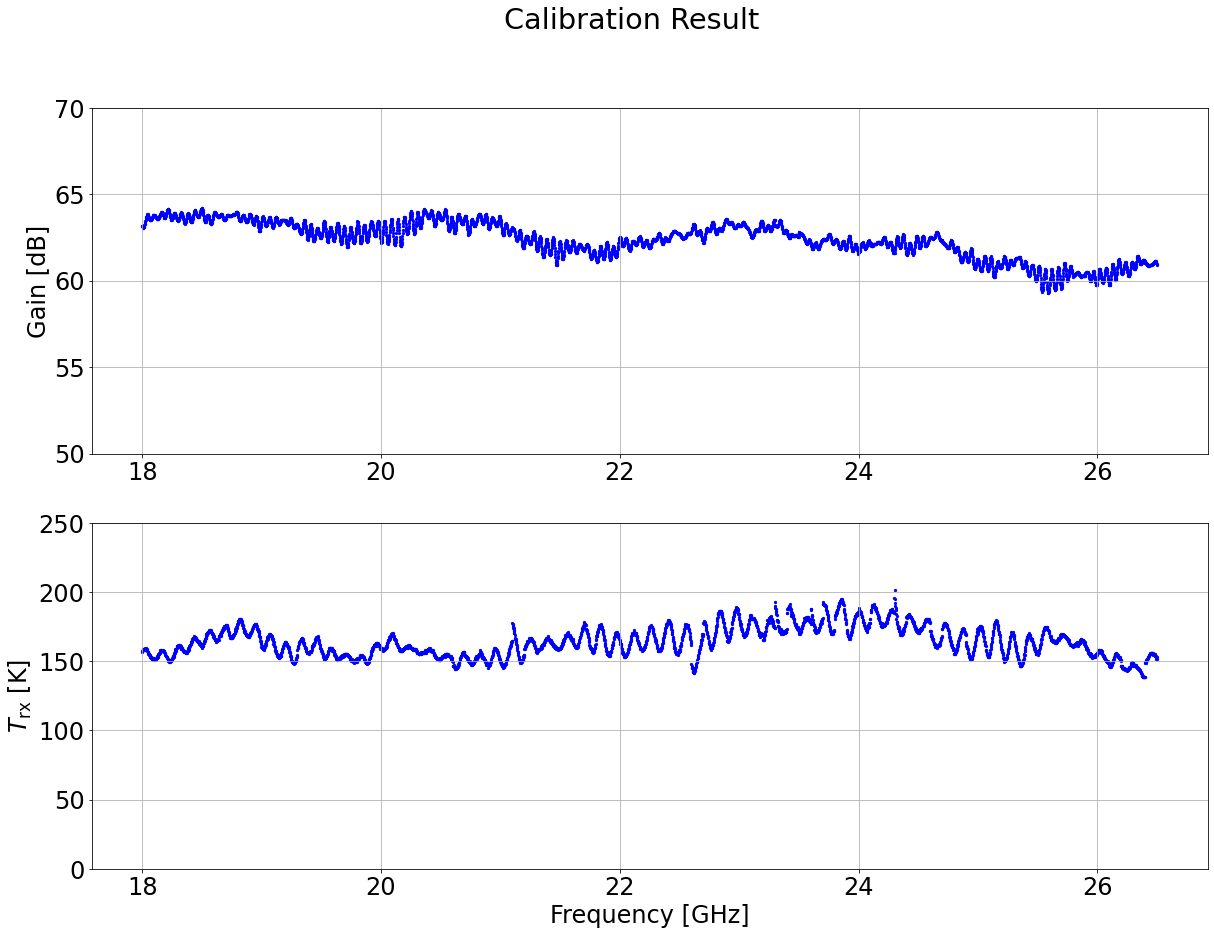

In [2]:
plt.rcParams["font.size"] = 24
fig, axes = plt.subplots(2,1,figsize=(20,14), squeeze=False, sharex=False)
plt.suptitle("Calibration Result")


y = func.csv_to_array("../data/ms2840a/result_data/yfactor_result_rebin2MHz.csv")

ax = axes[0][0]
ax.scatter(y["freq"], 10*np.log10(y["Gain"]), s=5, color="blue", label="null sample")
ax.set_ylabel("Gain [dB]")
ax.grid()
ax.set_ylim([50,70])
ax.set_yticks([50, 55, 60, 65, 70])

ax = axes[1][0]
ax.scatter(y["freq"], y["Trx"], s=5, color="blue", label="null sample")
ax.set_xlabel("Frequency [GHz]")
ax.set_ylabel(r"$T_{\rm rx}$ [K]")
ax.set_ylim([0,250])
ax.grid()

#plt.savefig("../result_figure/slide_figure/gain_Trx.pdf")

0.06835459615129354
931.04861633488
42253.57860391085


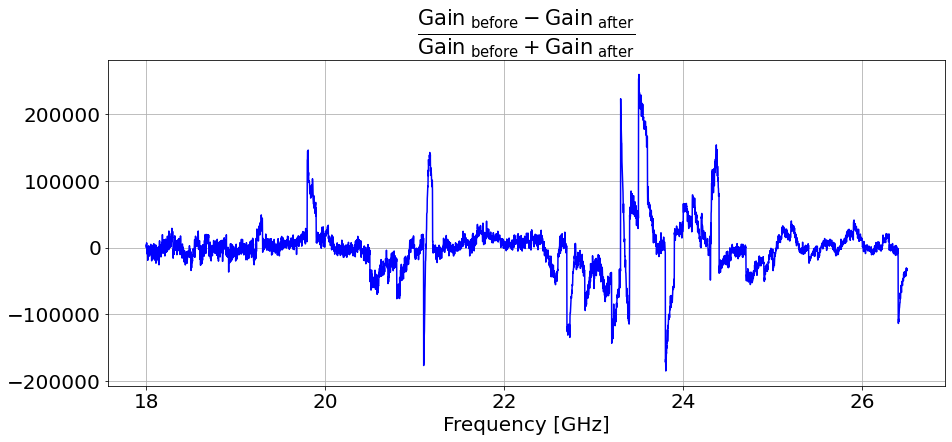

In [5]:
plt.rcParams["font.size"] = 20
plt.figure(figsize=(15,6))
ratio = (y["Gain_ini"]-y["Gain_fin"])/(y["Gain_ini"]+y["Gain_fin"])
plt.plot(y["freq"], y["Gain_ini"]-y["Gain_fin"], color="blue")
plt.title(r"$\rm \frac{Gain_{~before}-Gain_{~after}}{Gain_{~before}+Gain_{~after}}$", fontsize=30)
plt.ylabel("")
plt.xlabel("Frequency [GHz]")
#plt.yscale("log")
plt.grid()
print(np.max(ratio))
#plt.ylim([-0.15, 0.15])
#plt.savefig("../result_figure/gain_err_result.pdf")
print(np.mean(y["Gain_ini"]-y["Gain_fin"]))
print(np.std(y["Gain_ini"]-y["Gain_fin"]))

In [ ]:
for i in range(180, 265, 1):
    start_freq = i/10
    initial = int(start_freq * 1.e+6 - 250)
    final = int(initial + 1.e+5)

    for j in range(initial, final, 2000):
        word = list(str(j))
        word.insert(2, ".")
        start = "".join(word)
        
        path = "/data/ms2840a/result_data/signal_12_data/start_{}GHz.csv".format(start)